[IPython Notebook](legacy_contact_binary.ipynb) |  [Python Script](legacy_contact_binary.py)

Comparing Contacts Binaries in PHOEBE 2.0 vs PHOEBE Legacy
============================

**NOTE**: PHOEBE 1.0 legacy is an alternate backend and is not installed with PHOEBE 2.0.  In order to run this backend, you'll need to have [PHOEBE 1.0](https://phoebe-project.org/1.0) installed.

Setup
-----------------------------

As always, let's do imports and initialize a logger and a new bundle.  See [Building a System](../tutorials/building_a_system.html) for more details.

In [1]:
%matplotlib inline

In [2]:
import phoebe
from phoebe import u
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger()

b = phoebe.default_binary(contact_binary=True)

/usr/local/lib/python2.7/dist-packages/astropy/units/quantity.py:732: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  return super(Quantity, self).__eq__(other)


Adding Datasets and Compute Options
--------------------

In [3]:
b.add_dataset('lc', times=np.linspace(0,1,101), dataset='lc01')
b.add_dataset('rv', times=np.linspace(0,1,101), dataset='rv01')

<ParameterSet: 16 parameters | contexts: compute, dataset>

Let's add compute options for phoebe using the new (marching) method for creating meshes.

In [4]:
b.add_compute('phoebe', compute='phoebe2', mesh_method='marching')

<ParameterSet: 31 parameters | datasets: lc01, rv01>

Now we add compute options for the 'legacy' backend.

In [5]:
b.add_compute('legacy', compute='phoebe1')

<ParameterSet: 12 parameters | datasets: lc01, rv01>

Let's use the external atmospheres available for both phoebe1 and phoebe2

In [6]:
b.set_value_all('atm', 'extern_planckint')

Set value of gridsize for the trapezoidal (WD) mesh.

In [7]:
b.set_value_all('gridsize', 30)

Let's also disable other special effect such as heating, gravity, and light-time effects.

In [8]:
b.set_value_all('ld_func', 'logarithmic')
b.set_value_all('ld_coeffs', [0.0, 0.0])

b.set_value_all('refl_num',0)
b.set_value_all('rv_grav', False)
b.set_value_all('ltte', False)

Finally, let's compute our models

In [9]:
b.run_compute(compute='phoebe2', model='phoebe2model', irrad_method='none')

<ParameterSet: 6 parameters | kinds: rv, lc>

In [10]:
b.run_compute(compute='phoebe1', model='phoebe1model')

<ParameterSet: 6 parameters | kinds: rv, lc>

Plotting
-------------------------

### Light Curve

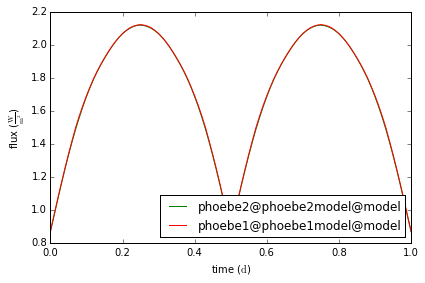

In [11]:
axs, artists = b['lc01@phoebe2model'].plot(color='g')
axs, artists = b['lc01@phoebe1model'].plot(color='r')
leg = plt.legend(loc=4)

Now let's plot the residuals between these two models

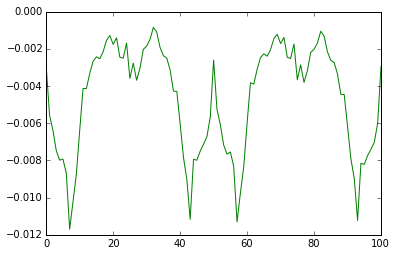

In [12]:
artist, = plt.plot(b.get_value('fluxes@lc01@phoebe2model') - b.get_value('fluxes@lc01@phoebe1model'), 'g-')
artist = plt.axhline(0.0, linestyle='dashed', color='k')

### RVs

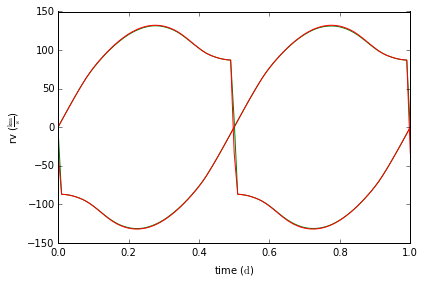

In [13]:
axs, artists = b['rv01@phoebe2model'].plot(color='g')
axs, artists = b['rv01@phoebe1model'].plot(color='r')

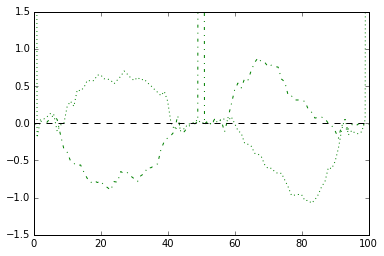

In [19]:
artist, = plt.plot(b.get_value('rvs@primary@phoebe2model', ) - b.get_value('rvs@primary@phoebe1model'), color='g', ls=':')
artist, = plt.plot(b.get_value('rvs@secondary@phoebe2model') - b.get_value('rvs@secondary@phoebe1model'), color='g', ls='-.')
artist = plt.axhline(0.0, linestyle='dashed', color='k')
ylim = plt.ylim(-1.5, 1.5)